In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import butter, filtfilt
from os.path import isfile, join
import zipfile
import os
import json
from pathlib import Path


In [2]:
import analyze

In [3]:
path = Path('../data/Timo')
onlyfiles = [f for f in os.listdir(path) if '.Identifier' not in f]

# Use all zips
zip_files = {}
for filename in onlyfiles:
    name = filename.removesuffix('.zip')
    parts = name.split()
    if len(parts) >= 3:
        key = f"{parts[0]}_{parts[1]}"
        zip_files[key] = filename

print(zip_files)

{'base_2025-06-11': 'base 2025-06-11 15-08-29.zip', '200ml_2025-06-07': '200ml 2025-06-07 12-52-34.zip', '230ml_2025-06-09': '230ml 2025-06-09 11-42-04.zip', 'base_2025-06-09': 'base 2025-06-09 11-04-21.zip', '150ml_2025-06-12': '150ml 2025-06-12 17-30-26.zip', '230ml_2025-06-11': '230ml 2025-06-11 15-48-34.zip', 'base_2025-06-13': 'base 2025-06-13 17-44-09.zip', 'base_2025-06-06': 'base 2025-06-06 15-45-11.zip', '470ml_2025-06-08': '470ml 2025-06-08 15-38-54.zip', 'base_2025-06-12': 'base 2025-06-12 16-47-24.zip', 'base_2025-06-07': 'base 2025-06-07 12-17-44.zip', '85ml_2025-06-13': '85ml 2025-06-13 18-16-35.zip', 'base_2025-06-08': 'base 2025-06-08 15-05-01.zip', 'base_2025-06-10': 'base 2025-06-10 20-20-33.zip', '230ml_2025-06-06': '230ml 2025-06-06 16-22-45.zip', '230ml_2025-06-10': '230ml 2025-06-10 20-56-58.zip'}


In [4]:
# Or select specific ones:
# zip_files = {
#     'base_2025-06-06': 'base 2025-06-06 15-45-11.zip',
#     'base_2025-06-07': 'base 2025-06-07 12-17-44.zip', 
#     '200ml_2025-06-07': '200ml 2025-06-07 12-52-34.zip',
#     '230ml_2025-06-06': '230ml 2025-06-06 16-22-45.zip'
# }
# data_path = "/Users/shavindra/Documents/Personal/MLQS/MLQS/data/Timo"
analyzer = analyze.CaffeineAnalyzer(data_path=path, zip_files=zip_files)
analyzer.extract_and_load_data()
analyzer.explore_data_structure()


Loading base_2025-06-11 from base 2025-06-11 15-08-29.zip
  Files in base 2025-06-11 15-08-29.zip:
    - Accelerometer.csv
    - Gyroscope.csv
    - Linear Acceleration.csv
    - meta/device.csv
    - meta/time.csv
      Loaded Accelerometer.csv as CSV: shape (12202, 4)
      Loaded Gyroscope.csv as CSV: shape (12175, 4)
      Loaded Linear Acceleration.csv as CSV: shape (6087, 4)

Loading 200ml_2025-06-07 from 200ml 2025-06-07 12-52-34.zip
  Files in 200ml 2025-06-07 12-52-34.zip:
    - Accelerometer.csv
    - Gyroscope.csv
    - Linear Acceleration.csv
    - meta/device.csv
    - meta/time.csv
      Loaded Accelerometer.csv as CSV: shape (22461, 4)
      Loaded Gyroscope.csv as CSV: shape (22423, 4)
      Loaded Linear Acceleration.csv as CSV: shape (11211, 4)

Loading 230ml_2025-06-09 from 230ml 2025-06-09 11-42-04.zip
  Files in 230ml 2025-06-09 11-42-04.zip:
    - Accelerometer.csv
    - Gyroscope.csv
    - Linear Acceleration.csv
    - meta/device.csv
    - meta/time.csv
      L

In [5]:
analyzer.all_data

{'base_2025-06-11': {'Accelerometer.csv':           Time_s  Acceleration_x_m/s^2  Acceleration_y_m/s^2  \
  0       0.023073              0.658924              1.036391   
  1       0.025462              0.651745              1.007677   
  2       0.027851              0.797707              0.959821   
  3       0.030240              0.900599              0.957428   
  4       0.032629              0.864706              0.964607   
  ...          ...                   ...                   ...   
  12197  29.122610              1.515853              2.657230   
  12198  29.124995              1.525724              2.688336   
  12199  29.127381              1.592723              2.669194   
  12200  29.129767              1.671686              2.702693   
  12201  29.132153              1.702792              2.724229   
  
         Acceleration_z_m/s^2  
  0                 10.034002  
  1                 10.136894  
  2                 10.194322  
  3                 10.223036  
  4  

In [6]:
def print_keys_recursively(data, indent: int = 0):
    """
    Recursively prints all dict keys and list indices in `data`.
    """
    spacer = "    " * indent
    if isinstance(data, dict):
        for key, value in data.items():
            print(f"{spacer}{key}")
            print_keys_recursively(value, indent + 1)
    elif isinstance(data, list):
        for idx, item in enumerate(data):
            print(f"{spacer}[{idx}]")
            print_keys_recursively(item, indent + 1)
    # you can add more type checks here if needed (e.g. for custom containers)

# Then just call it on your analyzer’s data:
print_keys_recursively(analyzer.all_data)

base_2025-06-11
    Accelerometer.csv
    Gyroscope.csv
    Linear Acceleration.csv
200ml_2025-06-07
    Accelerometer.csv
    Gyroscope.csv
    Linear Acceleration.csv
230ml_2025-06-09
    Accelerometer.csv
    Gyroscope.csv
    Linear Acceleration.csv
base_2025-06-09
    Accelerometer.csv
    Gyroscope.csv
    Linear Acceleration.csv
150ml_2025-06-12
    Accelerometer.csv
    Gyroscope.csv
    Linear Acceleration.csv
230ml_2025-06-11
    Accelerometer.csv
    Gyroscope.csv
    Linear Acceleration.csv
base_2025-06-13
    Accelerometer.csv
    Gyroscope.csv
    Linear Acceleration.csv
base_2025-06-06
    Accelerometer.csv
    Gyroscope.csv
    Linear Acceleration.csv
470ml_2025-06-08
    Accelerometer.csv
    Gyroscope.csv
    Linear Acceleration.csv
base_2025-06-12
    Accelerometer.csv
    Gyroscope.csv
    Linear Acceleration.csv
base_2025-06-07
    Accelerometer.csv
    Gyroscope.csv
    Linear Acceleration.csv
85ml_2025-06-13
    Accelerometer.csv
    Gyroscope.csv
    Linear Acce

In [7]:
import re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_date(key):
    """Pull the YYYY-MM-DD from the dataset name and convert to datetime."""
    m = re.search(r'(\d{4}-\d{2}-\d{2})', key)
    return datetime.strptime(m.group(1), '%Y-%m-%d') if m else datetime.min

def plot_combined_accelerations(all_data):
    # 1. Build combined DataFrame
    records = []
    for name, data_dict in all_data.items():
        df = data_dict.get('Accelerometer.csv')
        if df is None:
            continue
        tmp = df[['Time_s', 'Acceleration_x_m/s^2', 'Acceleration_y_m/s^2']].copy()
        tmp['dataset'] = name
        records.append(tmp)
    if not records:
        print("No accelerometer data found.")
        return
    combined = pd.concat(records, ignore_index=True)

    # 2. Build a hue_order sorted purely by the embedded date
    available = combined['dataset'].unique()
    hue_order = sorted(available, key=extract_date)

    # 3. Plot settings
    sns.set_theme(style="whitegrid")

    # 4. Accel X
    plt.figure(figsize=(10, 5))
    sns.lineplot(
        data=combined,
        x='Time_s', y='Acceleration_x_m/s^2',
        hue='dataset', hue_order=hue_order,
        linewidth=1
    )
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration X (m/s²)')
    plt.title('Combined Acceleration X (chronological order)')
    plt.legend(title='Dataset', loc='best')
    plt.tight_layout()
    plt.show()

    # 5. Accel Y
    plt.figure(figsize=(10, 5))
    sns.lineplot(
        data=combined,
        x='Time_s', y='Acceleration_y_m/s^2',
        hue='dataset', hue_order=hue_order,
        linewidth=1
    )
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration Y (m/s²)')
    plt.title('Combined Acceleration Y (chronological order)')
    plt.legend(title='Dataset', loc='best')
    plt.tight_layout()
    plt.show()


/Users/shavindra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shavindra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


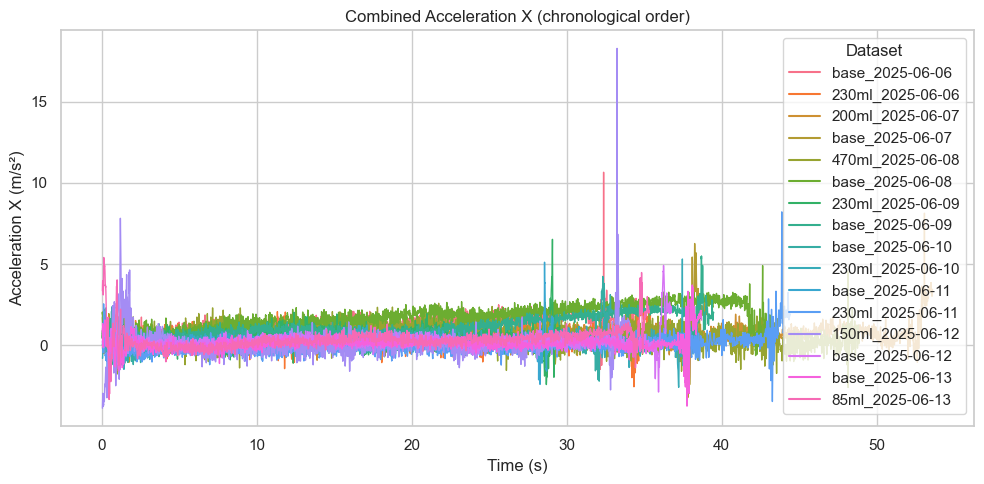

/Users/shavindra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shavindra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


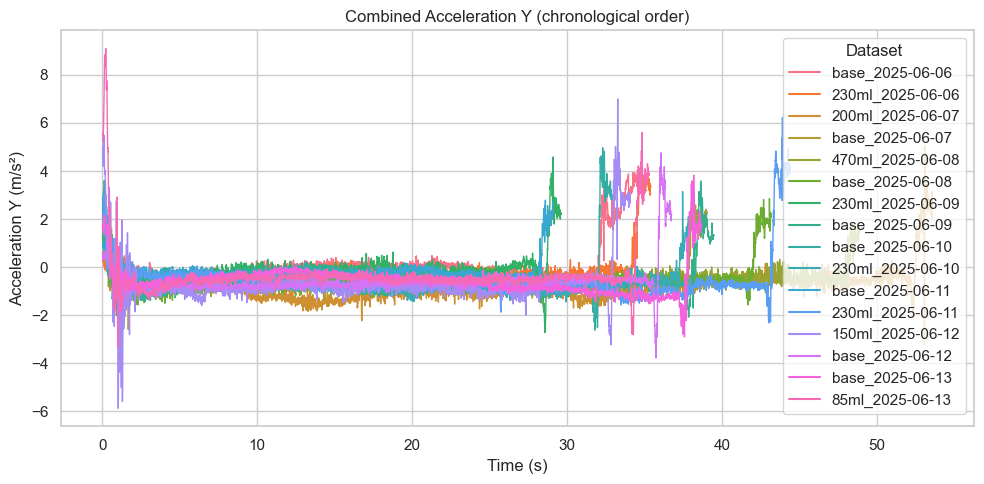

In [8]:
plot_combined_accelerations(analyzer.all_data)


In [9]:
import re
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# 1. Helper to pull the date out of your key
def extract_date(key):
    m = re.search(r'(\d{4}-\d{2}-\d{2})', key)
    return datetime.strptime(m.group(1), '%Y-%m-%d') if m else datetime.min

# 2. Compute global min/max time across all Accelerometer CSVs
times = []

all_data = analyzer.all_data  # Assuming this is the loaded data structure
for data_dict in all_data.values():
    df = data_dict.get('Accelerometer.csv')
    if df is not None:
        times.append(df['Time_s'])
if not times:
    raise RuntimeError("No accelerometer data found.")
all_times = pd.concat(times)
tmin, tmax = float(all_times.min()), float(all_times.max())

# 3. Plotting function (now filters by time_range)
def plot_accel(datasets, axis, time_range):
    if not datasets:
        plt.clf()
        plt.text(0.5, 0.5, "No datasets selected", ha='center')
        plt.axis('off')
        return

    # build combined DataFrame
    records = []
    for ds in datasets:
        df = all_data[ds].get('Accelerometer.csv')
        if df is None:
            continue
        tmp = df[['Time_s', 'Acceleration_x_m/s^2', 'Acceleration_y_m/s^2']].copy()
        tmp['dataset'] = ds
        records.append(tmp)
    combined = pd.concat(records, ignore_index=True)

    # filter by the slider range
    start, end = time_range
    mask = (combined['Time_s'] >= start) & (combined['Time_s'] <= end)
    combined = combined.loc[mask]

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 5))
    ycol = 'Acceleration_x_m/s^2' if axis=='X' else 'Acceleration_y_m/s^2'
    sns.lineplot(
        data=combined,
        x='Time_s', y=ycol,
        hue='dataset',
        hue_order=datasets,
        linewidth=1
    )
    plt.xlabel('Time (s)')
    plt.ylabel(f'Acceleration {axis} (m/s²)')
    plt.title(f'Combined Accel {axis} (t={start:.1f}–{end:.1f}s)')
    plt.legend(title='Dataset', loc='best')
    plt.tight_layout()
    plt.show()

# 4. Build widgets in chronological order
hue_order = sorted(all_data.keys(), key=extract_date)
checkboxes = { ds: widgets.Checkbox(value=False, description=ds)
               for ds in hue_order }

axis_widget = widgets.RadioButtons(
    options=['X','Y'],
    description='Axis:'
)

time_slider = widgets.FloatRangeSlider(
    value=[tmin, tmax],
    min=tmin, max=tmax,
    step=(tmax - tmin)/200,
    description='Time range (s):',
    continuous_update=False,
    layout=widgets.Layout(width='90%')
)

# 5. Wire them together
def _update(**kwargs):
    axis = kwargs.pop('axis')
    time_range = kwargs.pop('time_range')
    selected = [ds for ds, val in kwargs.items() if val]
    plot_accel(selected, axis, time_range)

controls = {**checkboxes, 'axis': axis_widget, 'time_range': time_slider}
out = widgets.interactive_output(_update, controls)

# 6. Display
display(
    widgets.VBox([
        widgets.Label("Select datasets (chronological):"),
        *checkboxes.values(),
        axis_widget,
        time_slider
    ]),
    out
)


Output()

In [17]:
import re
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

class AccelInteractivePlot:
    """
    Interactive accelerometer-playback widget using ipywidgets & seaborn.
    """
    def __init__(self, all_data):
        self.all_data = all_data
        self.keys = sorted(all_data.keys(), key=self._extract_date)
        self.tmin, self.tmax = self._compute_time_range()
        self._build_widgets()
    
    def _extract_date(self, key):
        m = re.search(r'(\d{4}-\d{2}-\d{2})', key)
        return datetime.strptime(m.group(1), '%Y-%m-%d') if m else datetime.min

    def _compute_time_range(self):
        times = []
        for data_dict in self.all_data.values():
            df = data_dict.get('Accelerometer.csv')
            if df is not None:
                times.append(df['Time_s'])
        if not times:
            raise RuntimeError("No accelerometer data found.")
        all_times = pd.concat(times)
        return float(all_times.min()), float(all_times.max())

    def _build_widgets(self):
        # Dataset checkboxes
        self.checkboxes = {
            ds: widgets.Checkbox(value=False, description=ds)
            for ds in self.keys
        }
        # Axis selector
        self.axis_widget = widgets.RadioButtons(
            options=['X', 'Y'],
            description='Axis:'
        )
        # Time-range slider
        self.time_slider = widgets.FloatRangeSlider(
            value=[self.tmin, self.tmax],
            min=self.tmin,
            max=self.tmax,
            step=(self.tmax - self.tmin) / 200,
            description='Time range (s):',
            continuous_update=False,
            layout=widgets.Layout(width='90%')
        )
        # Wire up interactive output
        controls = {**self.checkboxes,
                    'axis': self.axis_widget,
                    'time_range': self.time_slider}
        self.out = widgets.interactive_output(self._update, controls)

    def _update(self, **kwargs):
        axis = kwargs.pop('axis')
        time_range = kwargs.pop('time_range')
        selected = [ds for ds, val in kwargs.items() if val]
        self._plot(selected, axis, time_range)

    def _plot(self, datasets, axis, time_range):
        plt.clf()
        if not datasets:
            plt.text(0.5, 0.5, "No datasets selected", ha='center')
            plt.axis('off')
            display(plt.gcf())
            return

        # Combine and filter data
        records = []
        for ds in datasets:
            df = self.all_data[ds].get('Accelerometer.csv')
            if df is None:
                continue
            tmp = df[['Time_s', 'Acceleration_x_m/s^2', 'Acceleration_y_m/s^2']].copy()
            tmp['dataset'] = ds
            records.append(tmp)
        combined = pd.concat(records, ignore_index=True)
        start, end = time_range
        mask = (combined['Time_s'] >= start) & (combined['Time_s'] <= end)
        combined = combined.loc[mask]

        # Plot
        sns.set_theme(style="whitegrid")
        plt.figure(figsize=(10, 5))
        ycol = 'Acceleration_x_m/s^2' if axis == 'X' else 'Acceleration_y_m/s^2'
        sns.lineplot(
            data=combined,
            x='Time_s', y=ycol,
            hue='dataset',
            hue_order=datasets,
            linewidth=1
        )
        plt.xlabel('Time (s)')
        plt.ylabel(f'Acceleration {axis} (m/s²)')
        plt.title(f'Combined Accel {axis} (t={start:.1f}–{end:.1f}s)')
        plt.legend(title='Dataset', loc='best')
        plt.tight_layout()
        plt.show()

    def display(self):
        """Render the full widget (checkboxes + slider + plot)."""
        controls_box = widgets.VBox([
            widgets.Label("Select datasets (chronological):"),
            *self.checkboxes.values(),
            self.axis_widget,
            self.time_slider
        ])
        display(controls_box, self.out)


In [18]:

plotter = AccelInteractivePlot(analyzer.all_data)
plotter.display()

Output()